### Problema 1 


#### Regresion lineal de un polinomio 


Tomaremos los datos dados y realizaremos la regresion polinomial  mediante polinomial fitting y Lasso haciendo una prueba para revisar el grado del polinomio que mejor se acomoda a los datos.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed
import numpy.polynomial.polynomial as poly
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Cargamos los datos.

In [2]:
datos = pd.read_csv('problem1.csv')
datos.head()


,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611


Organizamos la parte de train y graficamos para ver los datos.

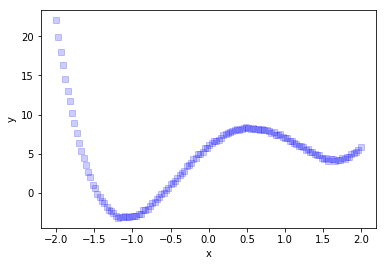

In [3]:
x = datos['X_training']
y = datos['Y_training']
Xt = datos['X_test']
Yt = datos['Y_test']
xt = Xt.iloc[:21]
yt = Yt.iloc[:21]
daRaw = plt.plot(x,y,'bs',alpha=0.2,)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('training.pdf', format='pdf', dpi=1200, bbox_inches="tight")
plt.show()



### Polynomial Fitting

Realizamos polinomial fitting para ver el polinomio que mejor se acerca a los datos.
usamos un grado de polinomio de prueba de grado 4, y luego hacemos AIC paara ver si este es el mejor grado.

In [7]:
coef = poly.polyfit(x, y, 4,rcond=None,w=None) 
coef

array([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109])

In [5]:
model = poly.Polynomial(coef)
print ('El polinomio que modela mejor estos datos es ')
model

El polinomio que modela mejor estos datos es 


Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

Graficamos con el training data

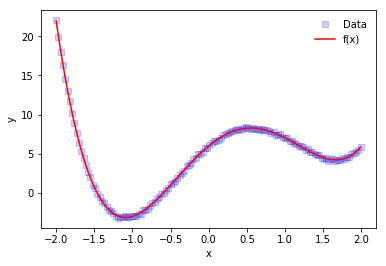

In [6]:
plt.plot(x, y,'bs',alpha=0.2, label='Data')
plt.plot(x, model(x),'r', label='f(x)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## b) Seleccion de modelo

In [23]:
Pol_Max = 10 
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

Checando los diferentes polinomios.

In [24]:
for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(x, y, i+1)
        model = poly.Polynomial(coef)
        RSSv[i]=0.5*np.sum((y-model(x))**2)
        AICv[i]=len(x)*math.log10(RSSv[i]/len(x))+ 2*len(coef)*len(x)/(len(x)-len(coef)-1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


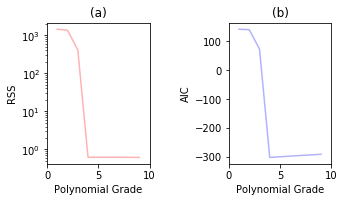

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.show()

In [26]:
grade = np.argmin(AICv)+1
grade

4

Entonces tenemos que el grado mas optimo para un polinomio de estos datos debe ser 4 que era con el que habiamos probado inicialmente, por tanto el mejor polinomio sigue siendo el dado anteriormente.

### C) plotting validation
Como este es el grado de polinomio que se escogio antes hacemos validation sobre los datos de test.

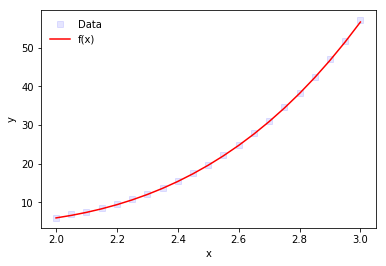

In [8]:
plt.plot(xt, yt,'bs',alpha=0.1, label='Data')
plt.plot(xt, model(xt),'r', label='f(x)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

 Ademas se realiza otra aproximacion por el metodo Lasso.

# Lasso


Para este utilizamos como training tomando la x conocida y creando 3 datos nuevo elevando hasta la 4.

In [13]:
train  = pd.DataFrame(data={'x1': x,'x2': x**2, 'x3': x**3, 'x4': x**4})
test = pd.DataFrame(data={'x1': xt,'x2': xt**2, 'x3': xt**3, 'x4': xt**4})


In [14]:
lasso_model = Lasso(alpha=0.0001,normalize=True, max_iter=1e6)
lasso_model.fit(train,y)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

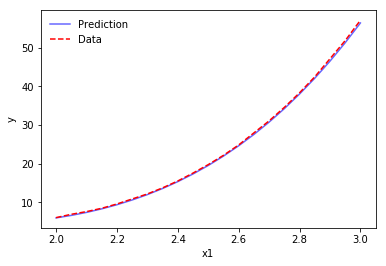

In [15]:
plt.plot(test.x1, lasso_model.predict(test),'b',alpha=0.6, label='Prediction')
plt.plot(test.x1, yt ,'r--', label='Data')
plt.legend(loc='best', frameon=False)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

Estos datos son muy similares a los de un polinomio y en el test tenemos que se ajusta de buena forma por lo que se considera que el polinomio dado en el polynomial fitting es el mejor, pues que los datos se comportaron muy bien, no se requiere trabajar con algoritmos mas complejos.